# Sequence comparison

In [1]:
import csv
from Bio import pairwise2
import pandas as pd

In [2]:
df_fegenie = pd.read_csv('FeGenie-geneSummary.csv')
df_ref = pd.read_csv('combined_output.csv')

In [3]:
df_fegenie

,category,genome/assembly,orf,HMM,bitscore,bitscore_cutoff,clusterID,heme_c_binding_motifs,heme_b_binding_motifs,hematite_binding_motifs,protein_sequence
0,iron_aquisition-siderophore_transport_potential,ST-45.fas,16241_140,ExbB-family,94.2,22.3,1,0,0,0,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...
1,iron_aquisition-siderophore_transport_potential,ST-45.fas,16241_141,ExbD-family,97.2,32.7,1,0,0,0,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...
2,iron_aquisition-siderophore_transport_potential,ST-45.fas,16241_142,TonB-family,47.6,21.8,1,0,0,0,MKNYGLSNLNSFLLALAIYISIVILVFFRLVSEVEPAIQYTDIKDS...
3,iron_aquisition-siderophore_transport,ST-45.fas,16241_169,FpvE-family-permease,39.4,25.8,2,0,0,0,MLEILNFTFFQNALLGAILVSIACGIIGTLVMINRLFSMAGGITHG...
4,iron_aquisition-siderophore_transport,ST-45.fas,16241_171,FpvC-family-siderophore-transport,52.8,18.5,2,0,0,0,MKKIILFILSLGIFYTFTQAKNLEQEQNTSSNLVSVSIAPQAFFVK...
...,...,...,...,...,...,...,...,...,...,...,...
142,iron_aquisition-siderophore_transport,ST-45.fas,39865_1369,PvuD-family-ATP-binding-protein,185.3,172.0,76,0,0,0,MLKIQDLSFAYHQKDLLKNIHLELKNQAFIGILGPNGSGKSTLLKL...
143,iron_aquisition-siderophore_transport,ST-45.fas,39865_1370,HatD-family-substrate-binding-protein,117.0,27.5,76,0,0,0,MKKILIIMSLFLITLNAKERLVVLDPASIETLFMLKAEDQIVGIAT...
144,iron_aquisition-siderophore_transport_potential,ST-45.fas,39865_1381,ExbB-family,120.9,22.3,77,0,0,0,MEFLKDYIDLIIFLILGIMAFIAFWCVVERMLFFRKINFKNYENQE...
145,iron_aquisition-siderophore_transport_potential,ST-45.fas,39865_1382,ExbD-family,74.1,32.7,77,0,0,0,MLKLPKNEGLNIVPFIDIMLVLLAIVLSISTFIAHGKIQISLPSSE...


In [4]:
selection = ['category','genome/assembly','HMM','orf','protein_sequence']
df1 = df_fegenie[selection]
df1

,category,genome/assembly,HMM,orf,protein_sequence
0,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbB-family,16241_140,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...
1,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbD-family,16241_141,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...
2,iron_aquisition-siderophore_transport_potential,ST-45.fas,TonB-family,16241_142,MKNYGLSNLNSFLLALAIYISIVILVFFRLVSEVEPAIQYTDIKDS...
3,iron_aquisition-siderophore_transport,ST-45.fas,FpvE-family-permease,16241_169,MLEILNFTFFQNALLGAILVSIACGIIGTLVMINRLFSMAGGITHG...
4,iron_aquisition-siderophore_transport,ST-45.fas,FpvC-family-siderophore-transport,16241_171,MKKIILFILSLGIFYTFTQAKNLEQEQNTSSNLVSVSIAPQAFFVK...
...,...,...,...,...,...
142,iron_aquisition-siderophore_transport,ST-45.fas,PvuD-family-ATP-binding-protein,39865_1369,MLKIQDLSFAYHQKDLLKNIHLELKNQAFIGILGPNGSGKSTLLKL...
143,iron_aquisition-siderophore_transport,ST-45.fas,HatD-family-substrate-binding-protein,39865_1370,MKKILIIMSLFLITLNAKERLVVLDPASIETLFMLKAEDQIVGIAT...
144,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbB-family,39865_1381,MEFLKDYIDLIIFLILGIMAFIAFWCVVERMLFFRKINFKNYENQE...
145,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbD-family,39865_1382,MLKLPKNEGLNIVPFIDIMLVLLAIVLSISTFIAHGKIQISLPSSE...


In [5]:
df1.protein_sequence.describe()

count                                                   147
unique                                                   56
top       MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...
freq                                                      5
Name: protein_sequence, dtype: object

In [6]:
df1 = df1.drop_duplicates(['protein_sequence'])
df1

,category,genome/assembly,HMM,orf,protein_sequence
0,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbB-family,16241_140,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...
1,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbD-family,16241_141,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...
2,iron_aquisition-siderophore_transport_potential,ST-45.fas,TonB-family,16241_142,MKNYGLSNLNSFLLALAIYISIVILVFFRLVSEVEPAIQYTDIKDS...
3,iron_aquisition-siderophore_transport,ST-45.fas,FpvE-family-permease,16241_169,MLEILNFTFFQNALLGAILVSIACGIIGTLVMINRLFSMAGGITHG...
4,iron_aquisition-siderophore_transport,ST-45.fas,FpvC-family-siderophore-transport,16241_171,MKKIILFILSLGIFYTFTQAKNLEQEQNTSSNLVSVSIAPQAFFVK...
5,iron_aquisition-iron_transport,ST-45.fas,FbpB-FutB-family-iron-permease,16241_197,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSNLTQF...
6,iron_aquisition-iron_transport,ST-45.fas,FutA1-family-iron-binding-proteins,16241_198,MKKIFLMFLTAFSFLGASELNIYSARHYDADFEIIKKFEEKTGIKV...
7,iron_gene_regulation,ST-45.fas,PF01475-Iron_dependent_repressor-fur_family,16241_315,MLKKHELKATPQRLCVLKILKRHEHPNIDELYTEIKKEYPSISLAT...
8,iron_gene_regulation,ST-45.fas,PF01475-Iron_dependent_repressor-fur_family,16241_389,MLIENVEYDVLLERFKKILRQGGLKYTKQREVLLKTLYHSDTHYTP...
9,iron_aquisition-siderophore_transport,ST-45.fas,PvdR-family-sideropore-export,16241_557,MKKKIVLIILIAILGSVGAYFIFFNNDEKISYLTQKIQKKDISQTI...


In [7]:
df_ref

,family name,gene sequence,sequence
0,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...
1,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...
2,Cj1397_sequence,YP_002344780.1 ferrous iron transport protein ...,MTLNELKDGQKAIIVNLNAHKELKNRLLSFGFIKNKNLKKIHSSLK...
3,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...
4,P19,48,MIKKVLSVVAAAAVISTNLFAGEVPIGDPKELNGMEIAAVYLQPIE...
5,CeuD,48,MIKLKNITKFYDNKVIISDLSLDFHKGKITSIIGANGAGKSTLLAL...
6,cfbpC,48,MLEIKNLSKNFGKIQALENINLHVKEGEFLSILGGSGSGKSTLLRI...
7,chuD,48,MKKILIIMSLFLIALNAKERLVVLDPASIETLFMLKAEDQIVGIAT...
8,tonB3,48,MKTFISNHKNQSSFITLFVFTPLFFVFLYSKDFLHIQPNETIKENK...
9,chuB,48,MLNLNTHSKILVIIGLLVAYIIASFTALCLGDENLNPKELFSYIFS...


In [8]:
def calculate_similarity(seq1, seq2):
    # Calculate the similarity of two sequences as a percentage
    alignments = pairwise2.align.globalxx(seq1, seq2)
    max_score = max(alignments, key=lambda x: x.score)[2]
    return max_score / max(len(seq1), len(seq2)) * 100


In [9]:
# Initialize an empty list to store the result rows
result_rows = []

In [10]:
# Iterate over each combination of rows from df1 and df_ref
for index1, row1 in df1.iterrows():
    for index2, row2 in df_ref.iterrows():
        # Calculate similarity score
        similarity = calculate_similarity(row1['protein_sequence'], row2['sequence'])
        
        # Combine all columns from both rows and add the similarity score
        combined_row = {**row1.to_dict(), **row2.to_dict(), 'similarity_score': similarity}
        
        # Append the combined row to the list
        result_rows.append(combined_row)


In [11]:
# Create a dataframe from the result rows
combined_df = pd.DataFrame(result_rows)

In [12]:
combined_df

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
0,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbB-family,16241_140,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,22.820037
1,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbB-family,16241_140,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,31.891892
2,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbB-family,16241_140,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,Cj1397_sequence,YP_002344780.1 ferrous iron transport protein ...,MTLNELKDGQKAIIVNLNAHKELKNRLLSFGFIKNKNLKKIHSSLK...,23.243243
3,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbB-family,16241_140,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,28.955224
4,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbB-family,16241_140,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,P19,48,MIKKVLSVVAAAAVISTNLFAGEVPIGDPKELNGMEIAAVYLQPIE...,32.972973
...,...,...,...,...,...,...,...,...,...
1731,iron_aquisition-siderophore_transport,ST-45.fas,HatD-family-substrate-binding-protein,39865_1370,MKKILIIMSLFLITLNAKERLVVLDPASIETLFMLKAEDQIVGIAT...,cfrB_11168_sequence,ADF43014.1 ferric enterobactin receptor [Campy...,MILNIKIIIFKGINLTQIKNIKFKKSLLCFLILSGALLKAEEKYQL...,24.005682
1732,iron_aquisition-siderophore_transport,ST-45.fas,HatD-family-substrate-binding-protein,39865_1370,MKKILIIMSLFLITLNAKERLVVLDPASIETLFMLKAEDQIVGIAT...,FeoB,48,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,25.244300
1733,iron_aquisition-siderophore_transport,ST-45.fas,HatD-family-substrate-binding-protein,39865_1370,MKKILIIMSLFLITLNAKERLVVLDPASIETLFMLKAEDQIVGIAT...,cfrB_81-176,EAQ73281.2 TonB-dependent receptor putative ...,MILNIKIIIFKGINLTQIKNMKFKKSLLCFLILSGALLKAEEKYQL...,23.863636
1734,iron_aquisition-siderophore_transport,ST-45.fas,HatD-family-substrate-binding-protein,39865_1370,MKKILIIMSLFLITLNAKERLVVLDPASIETLFMLKAEDQIVGIAT...,chuA,48,LHPNKKAFKLSLFALLLITNLNAQESNKAINLQKVVVSTTGFEQDA...,23.521127


In [13]:
# Save the combined DataFrame to a CSV file
combined_df.to_csv('combined_similarity_results.csv', index=False)


# Preprocessing for BLAST Analysis

In [14]:
df = pd.read_csv('combined_similarity_results.csv')
df

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
0,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbB-family,16241_140,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,22.820037
1,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbB-family,16241_140,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,31.891892
2,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbB-family,16241_140,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,Cj1397_sequence,YP_002344780.1 ferrous iron transport protein ...,MTLNELKDGQKAIIVNLNAHKELKNRLLSFGFIKNKNLKKIHSSLK...,23.243243
3,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbB-family,16241_140,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,28.955224
4,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbB-family,16241_140,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,P19,48,MIKKVLSVVAAAAVISTNLFAGEVPIGDPKELNGMEIAAVYLQPIE...,32.972973
...,...,...,...,...,...,...,...,...,...
1731,iron_aquisition-siderophore_transport,ST-45.fas,HatD-family-substrate-binding-protein,39865_1370,MKKILIIMSLFLITLNAKERLVVLDPASIETLFMLKAEDQIVGIAT...,cfrB_11168_sequence,ADF43014.1 ferric enterobactin receptor [Campy...,MILNIKIIIFKGINLTQIKNIKFKKSLLCFLILSGALLKAEEKYQL...,24.005682
1732,iron_aquisition-siderophore_transport,ST-45.fas,HatD-family-substrate-binding-protein,39865_1370,MKKILIIMSLFLITLNAKERLVVLDPASIETLFMLKAEDQIVGIAT...,FeoB,48,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,25.244300
1733,iron_aquisition-siderophore_transport,ST-45.fas,HatD-family-substrate-binding-protein,39865_1370,MKKILIIMSLFLITLNAKERLVVLDPASIETLFMLKAEDQIVGIAT...,cfrB_81-176,EAQ73281.2 TonB-dependent receptor putative ...,MILNIKIIIFKGINLTQIKNMKFKKSLLCFLILSGALLKAEEKYQL...,23.863636
1734,iron_aquisition-siderophore_transport,ST-45.fas,HatD-family-substrate-binding-protein,39865_1370,MKKILIIMSLFLITLNAKERLVVLDPASIETLFMLKAEDQIVGIAT...,chuA,48,LHPNKKAFKLSLFALLLITNLNAQESNKAINLQKVVVSTTGFEQDA...,23.521127


In [15]:
df.similarity_score.describe()

count    1736.000000
mean       29.791101
std        11.915822
min         8.948864
25%        23.564521
50%        28.398792
75%        35.040102
max       100.000000
Name: similarity_score, dtype: float64

In [16]:
df.protein_sequence.describe()

count                                                  1736
unique                                                   56
top       MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...
freq                                                     31
Name: protein_sequence, dtype: object

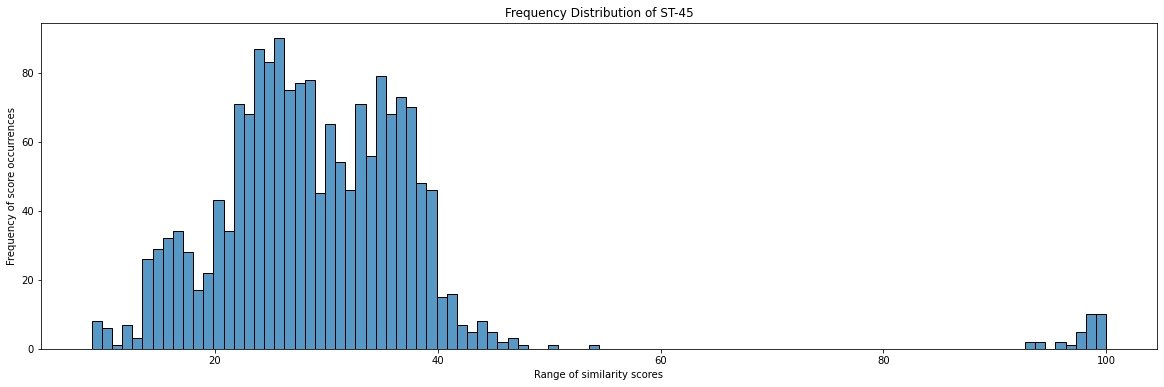

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,6))
sns.histplot(data=df, x='similarity_score', kde=False, bins = 100)


# Set the title and labels for the plot
plt.title('Frequency Distribution of ST-45')
plt.xlabel('Range of similarity scores')
plt.ylabel('Frequency of score occurrences')

plt.savefig('Frequency distribution of ST-45.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

In [18]:
# Create a new DataFrame with only 100% similarity
df_100_similarity = df[df['similarity_score'] == 100.0]

In [19]:
df_100_similarity

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
12,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbB-family,16241_140,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbB3,48,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,100.0
822,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbB-family,16241_1370,MEFLKDYIDLIIFLILGIMAFIAFWCVVERMLFFRKINFKNYENQE...,exbB2,48,MEFLKDYIDLIIFLILGIMAFIAFWCVVERMLFFRKINFKNYENQE...,100.0
862,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbD-family,16241_1371,MLKLPKNEGLNIVPFIDIMLVLLAIVLSISTFIAHGKIQISLPSSE...,exbD2,48,MLKLPKNEGLNIVPFIDIMLVLLAIVLSISTFIAHGKIQISLPSSE...,100.0
961,iron_aquisition-iron_transport,ST-45.fas,FbpB-FutB-family-iron-permease,56424_199,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,100.0


In [20]:
df_100_similarity = df_100_similarity.drop_duplicates(['protein_sequence'])
df_100_similarity

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
12,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbB-family,16241_140,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbB3,48,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,100.0
822,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbB-family,16241_1370,MEFLKDYIDLIIFLILGIMAFIAFWCVVERMLFFRKINFKNYENQE...,exbB2,48,MEFLKDYIDLIIFLILGIMAFIAFWCVVERMLFFRKINFKNYENQE...,100.0
862,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbD-family,16241_1371,MLKLPKNEGLNIVPFIDIMLVLLAIVLSISTFIAHGKIQISLPSSE...,exbD2,48,MLKLPKNEGLNIVPFIDIMLVLLAIVLSISTFIAHGKIQISLPSSE...,100.0
961,iron_aquisition-iron_transport,ST-45.fas,FbpB-FutB-family-iron-permease,56424_199,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,100.0


In [21]:
df_100_similarity.protein_sequence.describe()

count                                                     4
unique                                                    4
top       MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...
freq                                                      1
Name: protein_sequence, dtype: object

In [22]:
df_above95 = df[df['similarity_score'] >= 95.0]
df_above95 = df_above95.drop_duplicates('protein_sequence')
df_above95

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
12,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbB-family,16241_140,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbB3,48,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,100.000000
32,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbD-family,16241_141,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,99.230769
155,iron_aquisition-iron_transport,ST-45.fas,FbpB-FutB-family-iron-permease,16241_197,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSNLTQF...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,98.886827
189,iron_aquisition-iron_transport,ST-45.fas,FutA1-family-iron-binding-proteins,16241_198,MKKIFLMFLTAFSFLGASELNIYSARHYDADFEIIKKFEEKTGIKV...,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,98.208955
424,iron_aquisition-siderophore_transport,ST-45.fas,FpvE-family-permease,16241_1163,MRKKMLILSFLTLGMIGIFILVGLNGFDEYALKSRFLQIAAIIIVA...,CeuC,48,MRKKMLILSFLTLNMIGIFIFVGLNGFDEYALKSRFLQIAAIIIVA...,99.361022
439,iron_aquisition-siderophore_transport,ST-45.fas,PvuD-family-ATP-binding-protein,16241_1164,MIKLKNITKFYDNKAIISDLSLDFHKGKITSIIGANGTGKSTLLAL...,CeuD,48,MIKLKNITKFYDNKVIISDLSLDFHKGKITSIIGANGAGKSTLLAL...,97.222222
495,iron_aquisition-siderophore_transport,ST-45.fas,HatD-family-substrate-binding-protein,16241_1165,MKKSLVFAFFAFFLSLILTACNSNSNENNASSTTKTNTATVKVLPI...,CeuE,48,MKKSLVFAFFAFFLSLILTACNSNSNENNASSTTKTNTATVKVLPI...,98.187311
498,iron_aquisition-iron_transport,ST-45.fas,FeoA-family-iron-transporter,16241_1200,MTLNELKDGQKAIIVNLNAHKELKNRLLSFGFIKNKNLKKIHSSLK...,Cj1397_sequence,YP_002344780.1 ferrous iron transport protein ...,MTLNELKDGQKAIIVNLNAHKELKNRLLSFGFIKNKNLKKIHSSLK...,98.666667
554,iron_aquisition-iron_transport,ST-45.fas,FeoB-family-iron-transporter,16241_1201,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,FeoB,48,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,99.511401
722,iron_aquisition-siderophore_transport,ST-45.fas,FpvE-family-permease,16241_1357,MLNLNTHSKILVIIGLLVAYIIASFTALCLGDENLNPKELFSYIFS...,chuB,48,MLNLNTHSKILVIIGLLVAYIIASFTALCLGDENLNPKELFSYIFS...,99.696049


In [23]:
df_above90 = df[df['similarity_score'] >= 90.0]
df_above90 = df_above90.drop_duplicates('protein_sequence')
df_above90

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
12,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbB-family,16241_140,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbB3,48,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,100.000000
32,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbD-family,16241_141,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,99.230769
155,iron_aquisition-iron_transport,ST-45.fas,FbpB-FutB-family-iron-permease,16241_197,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSNLTQF...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,98.886827
189,iron_aquisition-iron_transport,ST-45.fas,FutA1-family-iron-binding-proteins,16241_198,MKKIFLMFLTAFSFLGASELNIYSARHYDADFEIIKKFEEKTGIKV...,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,98.208955
385,iron_aquisition-siderophore_transport,ST-45.fas,FpvE-family-permease,16241_1162,MISLFIGVISINVKDILNLNSTQLEIITLTRIPRLIAILLTGMSLS...,CeuB,48,LFFKHILSLKVLIALLLFFGMISLFIGVISINVKDILNLNSTQLEI...,92.879257
424,iron_aquisition-siderophore_transport,ST-45.fas,FpvE-family-permease,16241_1163,MRKKMLILSFLTLGMIGIFILVGLNGFDEYALKSRFLQIAAIIIVA...,CeuC,48,MRKKMLILSFLTLNMIGIFIFVGLNGFDEYALKSRFLQIAAIIIVA...,99.361022
439,iron_aquisition-siderophore_transport,ST-45.fas,PvuD-family-ATP-binding-protein,16241_1164,MIKLKNITKFYDNKAIISDLSLDFHKGKITSIIGANGTGKSTLLAL...,CeuD,48,MIKLKNITKFYDNKVIISDLSLDFHKGKITSIIGANGAGKSTLLAL...,97.222222
495,iron_aquisition-siderophore_transport,ST-45.fas,HatD-family-substrate-binding-protein,16241_1165,MKKSLVFAFFAFFLSLILTACNSNSNENNASSTTKTNTATVKVLPI...,CeuE,48,MKKSLVFAFFAFFLSLILTACNSNSNENNASSTTKTNTATVKVLPI...,98.187311
498,iron_aquisition-iron_transport,ST-45.fas,FeoA-family-iron-transporter,16241_1200,MTLNELKDGQKAIIVNLNAHKELKNRLLSFGFIKNKNLKKIHSSLK...,Cj1397_sequence,YP_002344780.1 ferrous iron transport protein ...,MTLNELKDGQKAIIVNLNAHKELKNRLLSFGFIKNKNLKKIHSSLK...,98.666667
554,iron_aquisition-iron_transport,ST-45.fas,FeoB-family-iron-transporter,16241_1201,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,FeoB,48,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,99.511401


In [24]:
df_above85 = df[df['similarity_score'] >= 85.0]
df_above85 = df_above85.drop_duplicates('protein_sequence')
df_above85

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
12,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbB-family,16241_140,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbB3,48,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,100.000000
32,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbD-family,16241_141,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,99.230769
155,iron_aquisition-iron_transport,ST-45.fas,FbpB-FutB-family-iron-permease,16241_197,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSNLTQF...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,98.886827
189,iron_aquisition-iron_transport,ST-45.fas,FutA1-family-iron-binding-proteins,16241_198,MKKIFLMFLTAFSFLGASELNIYSARHYDADFEIIKKFEEKTGIKV...,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,98.208955
385,iron_aquisition-siderophore_transport,ST-45.fas,FpvE-family-permease,16241_1162,MISLFIGVISINVKDILNLNSTQLEIITLTRIPRLIAILLTGMSLS...,CeuB,48,LFFKHILSLKVLIALLLFFGMISLFIGVISINVKDILNLNSTQLEI...,92.879257
424,iron_aquisition-siderophore_transport,ST-45.fas,FpvE-family-permease,16241_1163,MRKKMLILSFLTLGMIGIFILVGLNGFDEYALKSRFLQIAAIIIVA...,CeuC,48,MRKKMLILSFLTLNMIGIFIFVGLNGFDEYALKSRFLQIAAIIIVA...,99.361022
439,iron_aquisition-siderophore_transport,ST-45.fas,PvuD-family-ATP-binding-protein,16241_1164,MIKLKNITKFYDNKAIISDLSLDFHKGKITSIIGANGTGKSTLLAL...,CeuD,48,MIKLKNITKFYDNKVIISDLSLDFHKGKITSIIGANGAGKSTLLAL...,97.222222
495,iron_aquisition-siderophore_transport,ST-45.fas,HatD-family-substrate-binding-protein,16241_1165,MKKSLVFAFFAFFLSLILTACNSNSNENNASSTTKTNTATVKVLPI...,CeuE,48,MKKSLVFAFFAFFLSLILTACNSNSNENNASSTTKTNTATVKVLPI...,98.187311
498,iron_aquisition-iron_transport,ST-45.fas,FeoA-family-iron-transporter,16241_1200,MTLNELKDGQKAIIVNLNAHKELKNRLLSFGFIKNKNLKKIHSSLK...,Cj1397_sequence,YP_002344780.1 ferrous iron transport protein ...,MTLNELKDGQKAIIVNLNAHKELKNRLLSFGFIKNKNLKKIHSSLK...,98.666667
554,iron_aquisition-iron_transport,ST-45.fas,FeoB-family-iron-transporter,16241_1201,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,FeoB,48,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,99.511401


In [25]:
df_above80 = df[df['similarity_score'] >= 80.0]
df_above80 = df_above80.drop_duplicates('protein_sequence')
df_above80

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
12,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbB-family,16241_140,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbB3,48,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,100.000000
32,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbD-family,16241_141,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,99.230769
155,iron_aquisition-iron_transport,ST-45.fas,FbpB-FutB-family-iron-permease,16241_197,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSNLTQF...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,98.886827
189,iron_aquisition-iron_transport,ST-45.fas,FutA1-family-iron-binding-proteins,16241_198,MKKIFLMFLTAFSFLGASELNIYSARHYDADFEIIKKFEEKTGIKV...,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,98.208955
385,iron_aquisition-siderophore_transport,ST-45.fas,FpvE-family-permease,16241_1162,MISLFIGVISINVKDILNLNSTQLEIITLTRIPRLIAILLTGMSLS...,CeuB,48,LFFKHILSLKVLIALLLFFGMISLFIGVISINVKDILNLNSTQLEI...,92.879257
424,iron_aquisition-siderophore_transport,ST-45.fas,FpvE-family-permease,16241_1163,MRKKMLILSFLTLGMIGIFILVGLNGFDEYALKSRFLQIAAIIIVA...,CeuC,48,MRKKMLILSFLTLNMIGIFIFVGLNGFDEYALKSRFLQIAAIIIVA...,99.361022
439,iron_aquisition-siderophore_transport,ST-45.fas,PvuD-family-ATP-binding-protein,16241_1164,MIKLKNITKFYDNKAIISDLSLDFHKGKITSIIGANGTGKSTLLAL...,CeuD,48,MIKLKNITKFYDNKVIISDLSLDFHKGKITSIIGANGAGKSTLLAL...,97.222222
495,iron_aquisition-siderophore_transport,ST-45.fas,HatD-family-substrate-binding-protein,16241_1165,MKKSLVFAFFAFFLSLILTACNSNSNENNASSTTKTNTATVKVLPI...,CeuE,48,MKKSLVFAFFAFFLSLILTACNSNSNENNASSTTKTNTATVKVLPI...,98.187311
498,iron_aquisition-iron_transport,ST-45.fas,FeoA-family-iron-transporter,16241_1200,MTLNELKDGQKAIIVNLNAHKELKNRLLSFGFIKNKNLKKIHSSLK...,Cj1397_sequence,YP_002344780.1 ferrous iron transport protein ...,MTLNELKDGQKAIIVNLNAHKELKNRLLSFGFIKNKNLKKIHSSLK...,98.666667
554,iron_aquisition-iron_transport,ST-45.fas,FeoB-family-iron-transporter,16241_1201,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,FeoB,48,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,99.511401


In [26]:
df_above75 = df[df['similarity_score'] >= 75.0]
df_above75 = df_above75.drop_duplicates('protein_sequence')
df_above75

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
12,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbB-family,16241_140,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbB3,48,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,100.000000
32,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbD-family,16241_141,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,99.230769
155,iron_aquisition-iron_transport,ST-45.fas,FbpB-FutB-family-iron-permease,16241_197,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSNLTQF...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,98.886827
189,iron_aquisition-iron_transport,ST-45.fas,FutA1-family-iron-binding-proteins,16241_198,MKKIFLMFLTAFSFLGASELNIYSARHYDADFEIIKKFEEKTGIKV...,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,98.208955
385,iron_aquisition-siderophore_transport,ST-45.fas,FpvE-family-permease,16241_1162,MISLFIGVISINVKDILNLNSTQLEIITLTRIPRLIAILLTGMSLS...,CeuB,48,LFFKHILSLKVLIALLLFFGMISLFIGVISINVKDILNLNSTQLEI...,92.879257
424,iron_aquisition-siderophore_transport,ST-45.fas,FpvE-family-permease,16241_1163,MRKKMLILSFLTLGMIGIFILVGLNGFDEYALKSRFLQIAAIIIVA...,CeuC,48,MRKKMLILSFLTLNMIGIFIFVGLNGFDEYALKSRFLQIAAIIIVA...,99.361022
439,iron_aquisition-siderophore_transport,ST-45.fas,PvuD-family-ATP-binding-protein,16241_1164,MIKLKNITKFYDNKAIISDLSLDFHKGKITSIIGANGTGKSTLLAL...,CeuD,48,MIKLKNITKFYDNKVIISDLSLDFHKGKITSIIGANGAGKSTLLAL...,97.222222
495,iron_aquisition-siderophore_transport,ST-45.fas,HatD-family-substrate-binding-protein,16241_1165,MKKSLVFAFFAFFLSLILTACNSNSNENNASSTTKTNTATVKVLPI...,CeuE,48,MKKSLVFAFFAFFLSLILTACNSNSNENNASSTTKTNTATVKVLPI...,98.187311
498,iron_aquisition-iron_transport,ST-45.fas,FeoA-family-iron-transporter,16241_1200,MTLNELKDGQKAIIVNLNAHKELKNRLLSFGFIKNKNLKKIHSSLK...,Cj1397_sequence,YP_002344780.1 ferrous iron transport protein ...,MTLNELKDGQKAIIVNLNAHKELKNRLLSFGFIKNKNLKKIHSSLK...,98.666667
554,iron_aquisition-iron_transport,ST-45.fas,FeoB-family-iron-transporter,16241_1201,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,FeoB,48,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,99.511401


In [27]:
df_above70 = df[df['similarity_score'] >= 70.0]
df_above70 = df_above70.drop_duplicates('protein_sequence')
df_above70

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
12,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbB-family,16241_140,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbB3,48,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,100.000000
32,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbD-family,16241_141,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,99.230769
155,iron_aquisition-iron_transport,ST-45.fas,FbpB-FutB-family-iron-permease,16241_197,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSNLTQF...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,98.886827
189,iron_aquisition-iron_transport,ST-45.fas,FutA1-family-iron-binding-proteins,16241_198,MKKIFLMFLTAFSFLGASELNIYSARHYDADFEIIKKFEEKTGIKV...,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,98.208955
385,iron_aquisition-siderophore_transport,ST-45.fas,FpvE-family-permease,16241_1162,MISLFIGVISINVKDILNLNSTQLEIITLTRIPRLIAILLTGMSLS...,CeuB,48,LFFKHILSLKVLIALLLFFGMISLFIGVISINVKDILNLNSTQLEI...,92.879257
424,iron_aquisition-siderophore_transport,ST-45.fas,FpvE-family-permease,16241_1163,MRKKMLILSFLTLGMIGIFILVGLNGFDEYALKSRFLQIAAIIIVA...,CeuC,48,MRKKMLILSFLTLNMIGIFIFVGLNGFDEYALKSRFLQIAAIIIVA...,99.361022
439,iron_aquisition-siderophore_transport,ST-45.fas,PvuD-family-ATP-binding-protein,16241_1164,MIKLKNITKFYDNKAIISDLSLDFHKGKITSIIGANGTGKSTLLAL...,CeuD,48,MIKLKNITKFYDNKVIISDLSLDFHKGKITSIIGANGAGKSTLLAL...,97.222222
495,iron_aquisition-siderophore_transport,ST-45.fas,HatD-family-substrate-binding-protein,16241_1165,MKKSLVFAFFAFFLSLILTACNSNSNENNASSTTKTNTATVKVLPI...,CeuE,48,MKKSLVFAFFAFFLSLILTACNSNSNENNASSTTKTNTATVKVLPI...,98.187311
498,iron_aquisition-iron_transport,ST-45.fas,FeoA-family-iron-transporter,16241_1200,MTLNELKDGQKAIIVNLNAHKELKNRLLSFGFIKNKNLKKIHSSLK...,Cj1397_sequence,YP_002344780.1 ferrous iron transport protein ...,MTLNELKDGQKAIIVNLNAHKELKNRLLSFGFIKNKNLKKIHSSLK...,98.666667
554,iron_aquisition-iron_transport,ST-45.fas,FeoB-family-iron-transporter,16241_1201,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,FeoB,48,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,99.511401


In [28]:
# Get the protein sequences from df_above80
sequences_to_remove = df_above80['protein_sequence'].unique()

# Filter out the rows in df1 that have protein sequences with 80% similarity
df1_filtered = df1[~df1['protein_sequence'].isin(sequences_to_remove)]


In [29]:
df1_filtered

,category,genome/assembly,HMM,orf,protein_sequence
2,iron_aquisition-siderophore_transport_potential,ST-45.fas,TonB-family,16241_142,MKNYGLSNLNSFLLALAIYISIVILVFFRLVSEVEPAIQYTDIKDS...
3,iron_aquisition-siderophore_transport,ST-45.fas,FpvE-family-permease,16241_169,MLEILNFTFFQNALLGAILVSIACGIIGTLVMINRLFSMAGGITHG...
4,iron_aquisition-siderophore_transport,ST-45.fas,FpvC-family-siderophore-transport,16241_171,MKKIILFILSLGIFYTFTQAKNLEQEQNTSSNLVSVSIAPQAFFVK...
7,iron_gene_regulation,ST-45.fas,PF01475-Iron_dependent_repressor-fur_family,16241_315,MLKKHELKATPQRLCVLKILKRHEHPNIDELYTEIKKEYPSISLAT...
8,iron_gene_regulation,ST-45.fas,PF01475-Iron_dependent_repressor-fur_family,16241_389,MLIENVEYDVLLERFKKILRQGGLKYTKQREVLLKTLYHSDTHYTP...
9,iron_aquisition-siderophore_transport,ST-45.fas,PvdR-family-sideropore-export,16241_557,MKKKIVLIILIAILGSVGAYFIFFNNDEKISYLTQKIQKKDISQTI...
10,iron_aquisition-siderophore_transport,ST-45.fas,PvdT-family-siderophore-export,16241_558,MIFLKNICKNIGENAILKNVSLSIEKGEFVAIIGQSGSGKTSLLNI...
11,iron_storage,ST-45.fas,PF00210-Ferritin_like_domain,16241_563,MLSKEVVKLLNEQINKEMYAANLYLSMSSWCYENSLDGAGAFLFAH...
18,iron_storage,ST-45.fas,PF00210-Ferritin_like_domain,16241_1301,MSVTKQLLQMQADAHHLWVKFHNYHWNVKGLQFFSIHEYTEKAYEE...
19,iron_aquisition-siderophore_synthesis,ST-45.fas,PchH-family-siderophore-synthesis,16241_1332,MLKVCNLSKFYELKKHWYLKKERHIIFDNINFSLNENDNLIILGKS...


In [31]:
#Save the filtered DataFrame to a new CSV file

df1_filtered.to_csv('below80.csv', index=False)

In [1]:
import pandas as pd

def convert_csv_to_fasta(csv_file, fasta_file, sequence_column='protein_sequence'):
    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Open a file to write the FASTA formatted sequences
    with open(fasta_file, 'w') as fasta:
        for index, row in df.iterrows():
            # Write the header line for FASTA format
            fasta.write(f'>seq_{index}\n')
            # Write the sequence, splitting into lines if needed
            fasta.write('\n'.join([row[sequence_column][i:i+60] for i in range(0, len(row[sequence_column]), 60)]))
            fasta.write('\n')



In [3]:
def convert_csv_to_fasta(csv_file, fasta_file, sequence_column='protein_sequence', category_column='category'):
    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Open a file to write the FASTA formatted sequences
    with open(fasta_file, 'w') as fasta:
        for index, row in df.iterrows():
            # Write the header line for FASTA format, including the category
            fasta.write(f'>seq_{index}_{row[category_column]}\n')
            # Write the sequence, splitting into lines if needed
            fasta.write('\n'.join([row[sequence_column][i:i+60] for i in range(0, len(row[sequence_column]), 60)]))
            fasta.write('\n')

In [4]:
# Usage
csv_file_path = 'below80.csv'  # Replace with your CSV file path
fasta_file_path = 'output.fasta'  # The output FASTA file path
convert_csv_to_fasta(csv_file_path, fasta_file_path)


In [5]:
import pandas as pd

# Reading the CSV file without headers
df = pd.read_csv('TZAS0YCF013-Alignment-HitTable.csv', header=None)



In [6]:
# Adding your specific headers
df.columns = [
    'query acc.ver', 'subject acc.ver', '% identity', 'alignment length',
    'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end',
    'evalue', 'bit score', '% positives'
]



In [7]:
# Saving the DataFrame with new headers to a new CSV file
df.to_csv('blast_hits.csv', index=False)


In [8]:
df

,query acc.ver,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives
0,seq_0_iron_aquisition-siderophore_transport_po...,WP_002876984.1,100.000,259,0,0,1,259,1,259,0.0,517.0,100.00
1,seq_0_iron_aquisition-siderophore_transport_po...,WP_002868764.1,99.228,259,2,0,1,259,1,259,0.0,515.0,100.00
2,seq_0_iron_aquisition-siderophore_transport_po...,WP_012006621.1,99.614,259,1,0,1,259,1,259,0.0,515.0,99.61
3,seq_0_iron_aquisition-siderophore_transport_po...,WP_002859784.1,99.228,259,2,0,1,259,1,259,0.0,513.0,99.23
4,seq_0_iron_aquisition-siderophore_transport_po...,WP_002867816.1,98.456,259,4,0,1,259,1,259,0.0,509.0,98.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,seq_23_iron_aquisition-siderophore_transport,WP_014516903.1,100.000,267,0,0,1,267,1,267,0.0,516.0,100.00
674,seq_23_iron_aquisition-siderophore_transport,WP_002857348.1,98.876,267,3,0,1,267,1,267,0.0,513.0,100.00
675,seq_23_iron_aquisition-siderophore_transport,WP_002851986.1,99.251,267,2,0,1,267,1,267,0.0,512.0,99.25
676,seq_23_iron_aquisition-siderophore_transport,WP_002860605.1,99.251,267,2,0,1,267,1,267,0.0,511.0,99.25


In [9]:
blast_hits_df = pd.read_csv('blast_hits.csv')

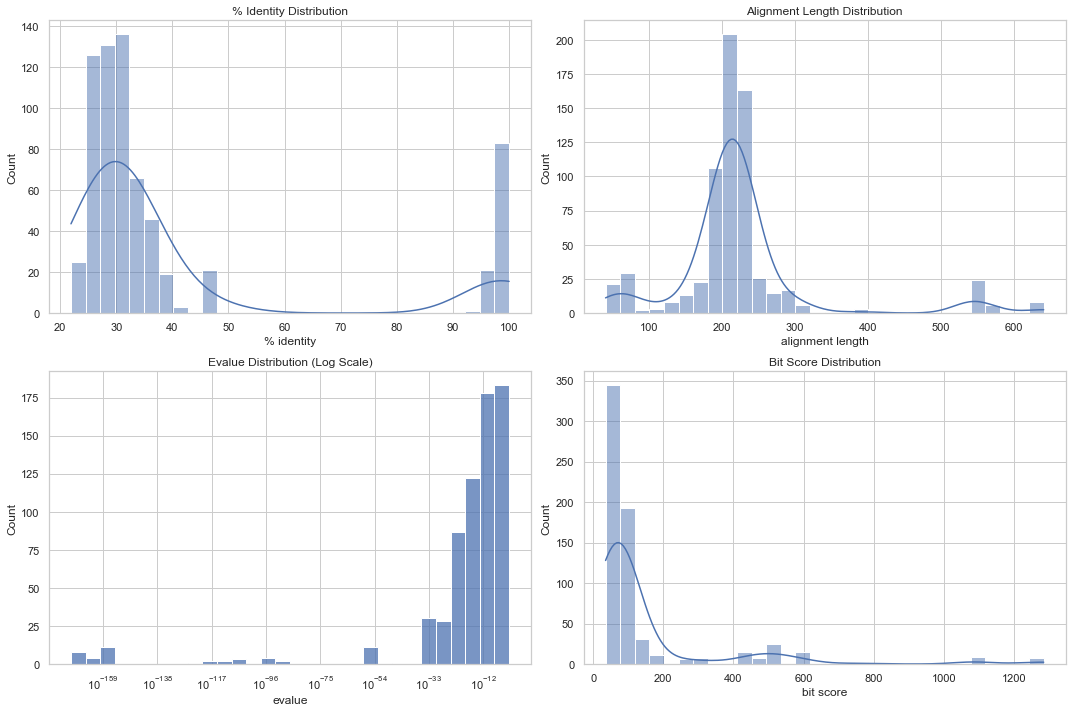

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting up the visualization style
sns.set(style="whitegrid")

# Creating subplots for different distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution of % Identity
sns.histplot(blast_hits_df['% identity'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('% Identity Distribution')

# Distribution of Alignment Length
sns.histplot(blast_hits_df['alignment length'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Alignment Length Distribution')

# Adjust 'evalue' to avoid log scale issues with zeros or negative values
adjusted_evalues = blast_hits_df['evalue'].replace(0, np.nan)  # Replace 0 with NaN
adjusted_evalues.fillna(1e-6, inplace=True)  # Replace NaN (originally 0) with a small number

# Distribution of Evalue
sns.histplot(adjusted_evalues, bins=30, ax=axes[1, 0], kde=False, log_scale=True)
axes[1, 0].set_title('Evalue Distribution (Log Scale)')

# Distribution of Bit Score
sns.histplot(blast_hits_df['bit score'], bins=30, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Bit Score Distribution')


plt.tight_layout()

plt.savefig('distributions.png')

plt.show()


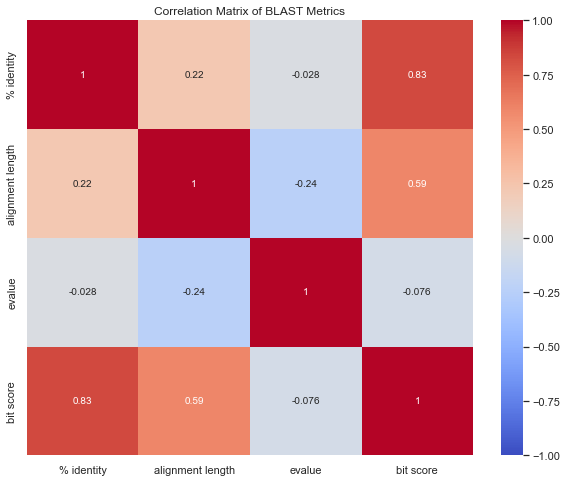

In [11]:
# Correlation analysis between key metrics
correlation_metrics = blast_hits_df[['% identity', 'alignment length', 'evalue', 'bit score']]
correlation_matrix = correlation_metrics.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of BLAST Metrics')

plt.savefig('correlation.png')

plt.show()


In [36]:
# Filter the combined_df to include only those rows where the similarity_score is below 80%
df_below80 = df[df['similarity_score'] < 80.0]
df_belwo80 = df_below80.drop_duplicates('protein_sequence')
df_below80

# Save the new DataFrame to a CSV file
#df_below80.to_csv('below_80.csv', index=False)

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
0,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbB-family,16241_140,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,22.820037
1,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbB-family,16241_140,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,31.891892
2,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbB-family,16241_140,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,Cj1397_sequence,YP_002344780.1 ferrous iron transport protein ...,MTLNELKDGQKAIIVNLNAHKELKNRLLSFGFIKNKNLKKIHSSLK...,23.243243
3,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbB-family,16241_140,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,28.955224
4,iron_aquisition-siderophore_transport_potential,ST-45.fas,ExbB-family,16241_140,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,P19,48,MIKKVLSVVAAAAVISTNLFAGEVPIGDPKELNGMEIAAVYLQPIE...,32.972973
...,...,...,...,...,...,...,...,...,...
1731,iron_aquisition-siderophore_transport,ST-45.fas,HatD-family-substrate-binding-protein,39865_1370,MKKILIIMSLFLITLNAKERLVVLDPASIETLFMLKAEDQIVGIAT...,cfrB_11168_sequence,ADF43014.1 ferric enterobactin receptor [Campy...,MILNIKIIIFKGINLTQIKNIKFKKSLLCFLILSGALLKAEEKYQL...,24.005682
1732,iron_aquisition-siderophore_transport,ST-45.fas,HatD-family-substrate-binding-protein,39865_1370,MKKILIIMSLFLITLNAKERLVVLDPASIETLFMLKAEDQIVGIAT...,FeoB,48,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,25.244300
1733,iron_aquisition-siderophore_transport,ST-45.fas,HatD-family-substrate-binding-protein,39865_1370,MKKILIIMSLFLITLNAKERLVVLDPASIETLFMLKAEDQIVGIAT...,cfrB_81-176,EAQ73281.2 TonB-dependent receptor putative ...,MILNIKIIIFKGINLTQIKNMKFKKSLLCFLILSGALLKAEEKYQL...,23.863636
1734,iron_aquisition-siderophore_transport,ST-45.fas,HatD-family-substrate-binding-protein,39865_1370,MKKILIIMSLFLITLNAKERLVVLDPASIETLFMLKAEDQIVGIAT...,chuA,48,LHPNKKAFKLSLFALLLITNLNAQESNKAINLQKVVVSTTGFEQDA...,23.521127


# BLAST

In [32]:
import pandas as pd
from Bio.Blast import NCBIWWW, NCBIXML
import time

In [33]:
def blast_search(sequence, program='blastp', database='nr', output_format='XML', taxid='192222'):
    result_handle = NCBIWWW.qblast(program, database, sequence, entrez_query=f"txid{taxid}[Organism]", format_type=output_format)
    return result_handle

def parse_blast_xml_to_csv(xml_handle, csv_file_path):
    blast_records = NCBIXML.parse(xml_handle)
    rows = []
    for record in blast_records:
        for alignment in record.alignments:
            for hsp in alignment.hsps:
                rows.append([
                    record.query, alignment.title, alignment.length,
                    hsp.score, hsp.bits, hsp.expect, hsp.query_start, 
                    hsp.query_end, hsp.sbjct_start, hsp.sbjct_end
                ])
                
    df = pd.DataFrame(rows, columns=["Query", "Subject", "Alignment Length", "Score", "Bits", "E-value", "Query Start", "Query End", "Subject Start", "Subject End"])
    df.to_csv(csv_file_path, index=False)

def main(file_path, output_dir):
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Iterate through each protein sequence
    for index, row in df.iterrows():
        sequence = row['protein_sequence']
        print(f"Performing BLAST search for sequence {index + 1}/{len(df)}")
        
        # Perform BLAST search
        result_handle = blast_search(sequence)
        
        # Parse XML and save to CSV
        csv_file_path = f"{output_dir}/blast_result_{index + 1}.csv"
        parse_blast_xml_to_csv(result_handle, csv_file_path)
        
        # Close the BLAST result handle
        result_handle.close()

        # To avoid overloading the server, add a delay between requests
        time.sleep(2) 


In [34]:
file_path = 'below80.csv'
output_dir = 'blast/'
main(file_path, output_dir)

Performing BLAST search for sequence 1/24
Performing BLAST search for sequence 2/24
Performing BLAST search for sequence 3/24
Performing BLAST search for sequence 4/24
Performing BLAST search for sequence 5/24
Performing BLAST search for sequence 6/24
Performing BLAST search for sequence 7/24
Performing BLAST search for sequence 8/24
Performing BLAST search for sequence 9/24
Performing BLAST search for sequence 10/24
Performing BLAST search for sequence 11/24
Performing BLAST search for sequence 12/24
Performing BLAST search for sequence 13/24
Performing BLAST search for sequence 14/24
Performing BLAST search for sequence 15/24
Performing BLAST search for sequence 16/24
Performing BLAST search for sequence 17/24
Performing BLAST search for sequence 18/24
Performing BLAST search for sequence 19/24
Performing BLAST search for sequence 20/24
Performing BLAST search for sequence 21/24
Performing BLAST search for sequence 22/24
Performing BLAST search for sequence 23/24
Performing BLAST sea